In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize

from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras import regularizers
from keras.layers import Dropout
from keras.optimizers import SGD


from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

#Seaborn
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [13]:
train_set = pd.read_csv ('../data/ML-CUP20-TR .csv')
train_set.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,-0.006309,0.020143,0.010106,0.003109,0.005619,0.023872,0.006110,-0.011253,0.007343,0.005921,48.474973,-28.571117
std,1.041026,1.045854,1.040690,1.048153,1.026938,1.054734,1.051558,1.045984,1.034932,1.057754,15.218671,10.269957
min,-2.247241,-2.158406,-2.068117,-3.190003,-2.657307,-3.467126,-2.167943,-2.435643,-2.298636,-2.325151,25.978398,-41.864859
25%,-0.987447,-0.909239,-0.907696,-0.749282,-0.920508,-0.658990,-0.983262,-0.893817,-0.939021,-0.972809,34.666957,-36.935725
50%,0.093405,0.062560,-0.023284,-0.030603,0.172423,-0.120652,0.136528,-0.005085,0.028914,0.208246,45.333403,-30.642449
75%,0.868999,0.894836,0.805138,0.695626,0.854577,0.701555,0.912320,0.783726,0.885435,0.829420,61.544593,-22.860160
max,2.289184,2.623750,2.846079,2.803400,2.250039,2.800493,2.679499,2.617978,2.526212,2.393244,78.836480,-4.064733


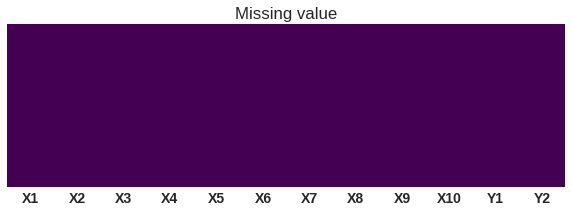

In [17]:

plt.figure(figsize=(10,3))
sns.heatmap(train_set.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value');

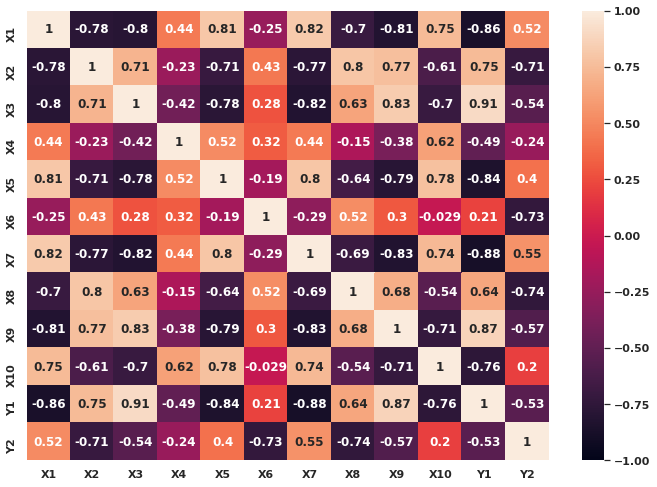

In [18]:

# correlation plot
corr = train_set.corr()
sns.color_palette("hls", 8)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot= True,vmin=-1, vmax=1);

# Negative Correlation
A negative (inverse) correlation occurs when the correlation coefficient is less than 0. This is an indication that both variables move in the opposite direction. In short, any reading between 0 and -1 means that the two securities move in opposite directions. When ρ is -1, the relationship is said to be perfectly negatively correlated. In short, if one variable increases, the other variable decreases with the same magnitude (and vice versa). However, the degree to which two securities are negatively correlated might vary over time (and they are almost never exactly correlated all the time).

# Positive Correlation
A positive correlation—when the correlation coefficient is greater than 0—signifies that both variables move in the same direction. When ρ is +1, it signifies that the two variables being compared have a perfect positive relationship; when one variable moves higher or lower, the other variable moves in the same direction with the same magnitude.


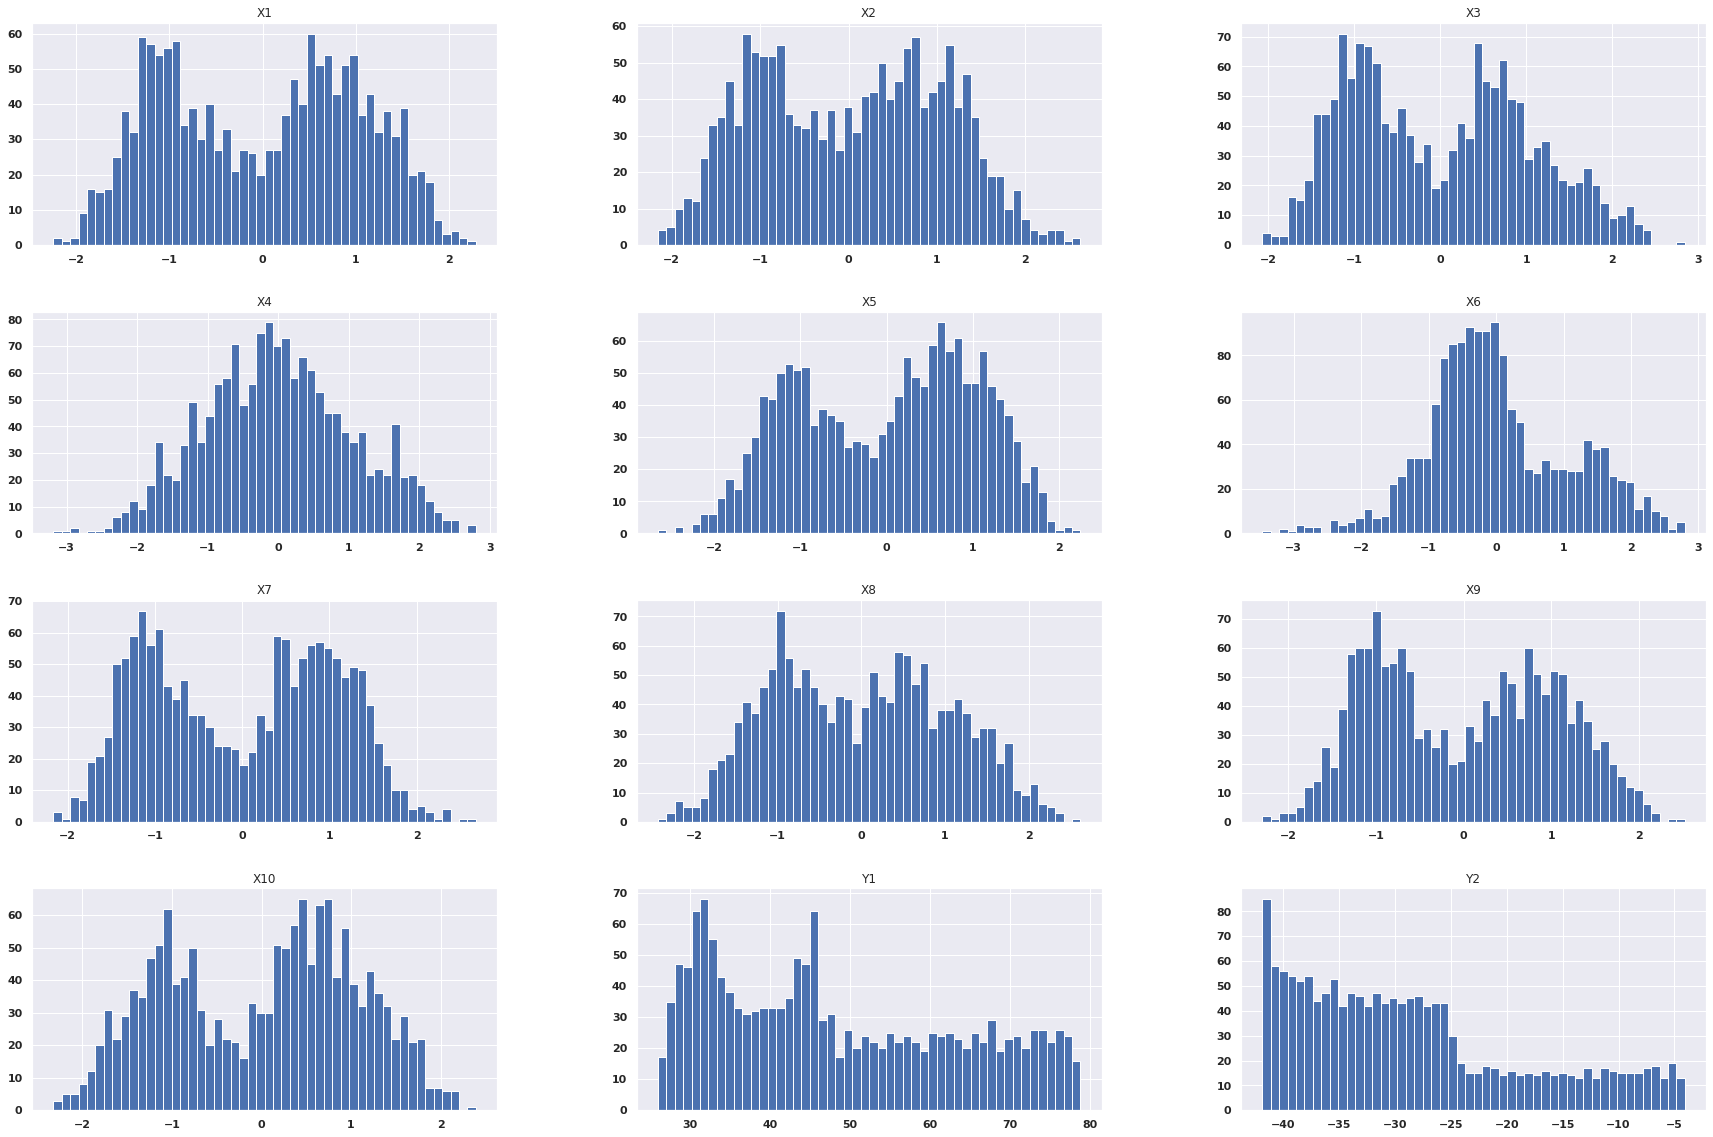

In [20]:
train_set.hist(bins=50, figsize=(30,20))
plt.show()